In [2]:
# setup environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# load data
data_path = "C:/Users/tug64107/Desktop/AI/play_AI/hands_on_tf/datasets/housing/housing.csv"
df = pd.read_csv(data_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


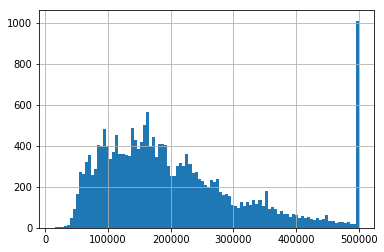

In [4]:
# how to split into categories
df["median_house_value"].hist(bins=100)
plt.show()

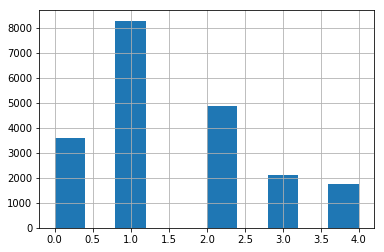

In [5]:
# create categories for stratified splitting
df["cat"] = np.floor(df["median_house_value"]/100000)
df["cat"].where(df["cat"]<=4, 4, inplace=True)
df["cat"].hist()
plt.show()

In [6]:
# train test split
train, test = train_test_split(df,test_size = 0.2,stratify=df["cat"])
print(train["cat"].value_counts()/len(train))
print(df["cat"].value_counts()/len(df))

1.0    0.401587
2.0    0.236858
0.0    0.174237
3.0    0.101502
4.0    0.085816
Name: cat, dtype: float64
1.0    0.401599
2.0    0.236870
0.0    0.174225
3.0    0.101502
4.0    0.085804
Name: cat, dtype: float64


In [7]:
# figure out how to transform the data

# make a copy
train=train.drop("cat",axis=1)
train1 = train.copy()
train1.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8463,-118.34,33.91,17.0,3724.0,1023.0,2536.0,971.0,3.2649,202100.0,<1H OCEAN
17174,-122.46,37.51,23.0,949.0,151.0,399.0,149.0,5.6286,411300.0,NEAR OCEAN
3152,-118.46,35.13,19.0,3109.0,640.0,1457.0,620.0,2.6417,94900.0,INLAND
4349,-118.38,34.11,38.0,2601.0,523.0,870.0,474.0,7.1134,416700.0,<1H OCEAN
16772,-122.48,37.69,42.0,2993.0,512.0,1594.0,546.0,4.4821,252400.0,NEAR OCEAN
6734,-118.10,34.12,49.0,3783.0,579.0,1601.0,539.0,6.3013,500001.0,<1H OCEAN
14573,-117.21,32.81,27.0,1318.0,216.0,495.0,191.0,5.2837,283800.0,NEAR OCEAN
2947,-118.99,35.33,36.0,1590.0,367.0,1311.0,390.0,1.6786,52900.0,INLAND
8215,-118.19,33.79,37.0,1834.0,551.0,1967.0,476.0,2.1370,126600.0,NEAR OCEAN
18289,-122.11,37.38,22.0,3638.0,719.0,1329.0,650.0,5.0804,500001.0,NEAR BAY


In [8]:
# check for null
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4762 to 7172
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16357 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [9]:
# insert average values in null of total_bedrooms
mean_bedrooms = np.floor(np.mean(train1["total_bedrooms"]))
train1["total_bedrooms"].fillna(mean_bedrooms,inplace=True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4762 to 7172
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


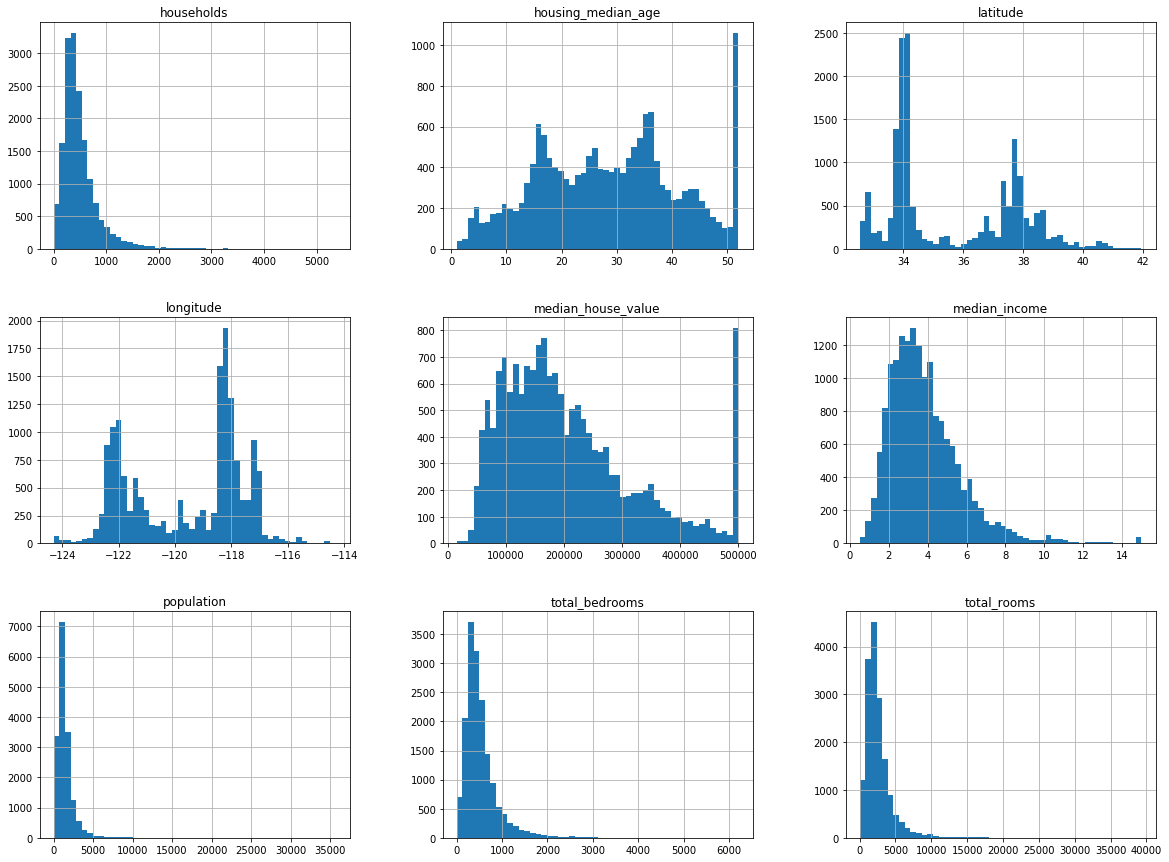

In [10]:
train1.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# turn ocean_proximity to int
print(train1["ocean_proximity"].value_counts())
train1["ocean_proximity"], ocean_labels = pd.factorize(train1["ocean_proximity"])
print(train1.sample(5))
print(ocean_labels)

In [94]:
# remove cap in median_house_value
train1 = train1[train1["median_house_value"]<500000]
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15728 entries, 1468 to 3176
Data columns (total 10 columns):
longitude             15728 non-null float64
latitude              15728 non-null float64
housing_median_age    15728 non-null float64
total_rooms           15728 non-null float64
total_bedrooms        15728 non-null float64
population            15728 non-null float64
households            15728 non-null float64
median_income         15728 non-null float64
median_house_value    15728 non-null float64
ocean_proximity       15728 non-null int64
dtypes: float64(9), int64(1)
memory usage: 1.3 MB


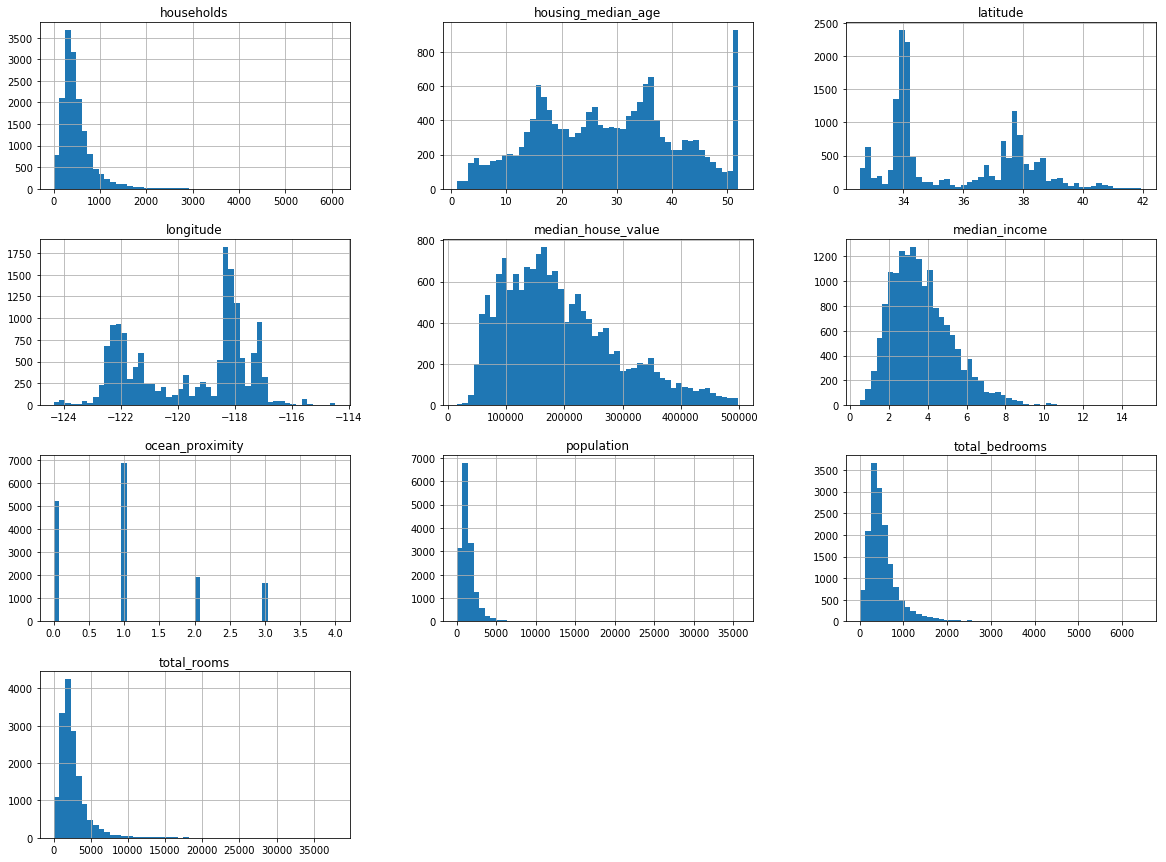

In [95]:
# don't mind me
train1.hist(bins=50, figsize=(20,15))
plt.show()

In [96]:
# add room per household and bedroom per room and people per household
train1["rooms_per_hhold"] = train1["total_rooms"]/train1["households"]
train1["bedrooms_per_room"] = train1["total_bedrooms"]/train1["total_rooms"]
train1.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hhold,bedrooms_per_room
18139,-122.01,37.34,31.0,3080.0,526.0,1493.0,582.0,6.3052,344200.0,1,5.292096,0.170779
18416,-121.83,37.27,8.0,4454.0,1058.0,2595.0,1027.0,4.5615,282600.0,1,4.336904,0.237539
16369,-121.31,38.01,22.0,2575.0,680.0,1367.0,645.0,1.4274,90500.0,0,3.992248,0.264078
19522,-121.00,37.65,17.0,484.0,202.0,198.0,204.0,0.6825,187500.0,0,2.372549,0.417355
1442,-122.00,37.99,28.0,4035.0,641.0,1881.0,659.0,5.4607,192300.0,0,6.122914,0.158860


In [97]:
train1.sample(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_hhold,bedrooms_per_room
3969,-118.58,34.20,35.0,1323.0,228.0,756.0,216.0,4.2330,221300.0,1,6.125000,0.172336
2254,-119.81,36.80,29.0,2806.0,552.0,1242.0,540.0,3.5958,88800.0,0,5.196296,0.196721
18781,-122.29,40.39,17.0,1682.0,332.0,887.0,316.0,1.8438,76400.0,0,5.322785,0.197384
11699,-117.97,33.89,17.0,1740.0,445.0,1158.0,412.0,2.8649,137500.0,1,4.223301,0.255747
20408,-118.88,34.19,26.0,2296.0,275.0,842.0,263.0,7.7889,309900.0,1,8.730038,0.119774
10797,-117.92,33.61,18.0,1538.0,425.0,425.0,288.0,5.3369,312500.0,1,5.340278,0.276333
8845,-118.39,34.08,28.0,833.0,230.0,349.0,210.0,3.0670,375000.0,1,3.966667,0.276110
5573,-118.30,33.86,35.0,1511.0,274.0,853.0,308.0,4.9792,251300.0,1,4.905844,0.181337
7018,-118.09,33.97,39.0,1473.0,297.0,1108.0,294.0,4.1389,166000.0,1,5.010204,0.201629
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,253800.0,2,4.933950,0.216332


In [98]:
print(train1["population"][19006])
print(train1["households"][19006])


7460.0
6.0


In [99]:
# drop households, total_rooms, total_bedrooms
to_drop = ["households", "total_rooms", "total_bedrooms"]
train1.drop(to_drop, axis=1,inplace=True)
train1.sample(5)


,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_hhold,bedrooms_per_room
3943,-118.61,34.21,34.0,1861.0,5.6407,251500.0,1,6.065972,0.159416
12903,-121.34,38.61,22.0,875.0,2.6023,142200.0,0,4.741333,0.229471
9989,-121.07,39.15,15.0,3002.0,2.4726,143400.0,0,5.180577,0.193175
14596,-117.17,32.81,26.0,974.0,4.7390,184100.0,2,6.464000,0.160066
6820,-118.09,34.08,34.0,986.0,2.6901,235600.0,1,4.502976,0.253800


In [101]:
# standardize all columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train1 = pd.DataFrame(scaler.fit_transform(train1), columns=train1.columns)
print(scaler.mean_)



[ -1.19566936e+02   3.56570587e+01   2.83626017e+01   1.43970187e+03
   3.68443549e+00   1.92186603e+05   1.00336979e+00   5.37976031e+00
   2.16299279e-01]


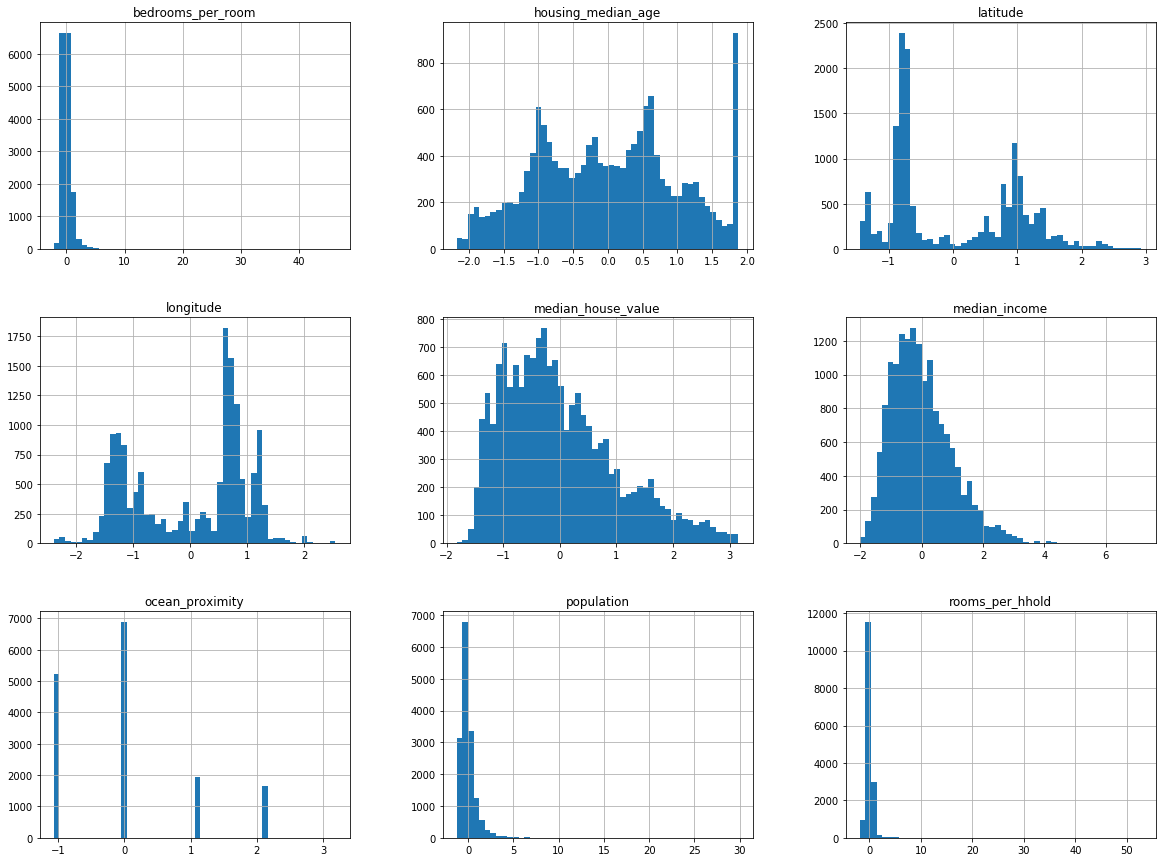

In [102]:
train1.hist(bins=50,figsize=(20,15))
plt.show()

In [103]:
train1.sample(10)

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_hhold,bedrooms_per_room
7790,-1.370947,1.054487,0.130354,-0.787596,-0.530679,-0.091390,2.124567,-0.169962,0.232483
14531,0.653189,-0.814096,0.369186,-0.684642,-0.693519,-1.022092,-0.003586,-0.416882,0.513558
14297,-0.096491,0.518609,0.767239,0.612746,-0.974600,-1.357350,-1.067662,-0.298242,-0.032718
13603,-1.151041,1.091766,-0.904583,0.030797,0.740037,-0.494523,-1.067662,0.480841,-0.754756
8204,1.107995,-0.702261,0.289575,0.563887,-0.877490,-1.107449,-1.067662,-0.199962,-0.166548
15438,-1.021096,1.911892,0.209965,-0.360950,-0.722241,-1.102307,-1.067662,0.130200,-0.080401
4697,-0.106487,1.413293,-0.904583,-0.961221,-0.780950,-0.767049,-1.067662,1.492848,-0.135093
5641,-1.365949,1.045168,0.130354,-0.488333,-0.896596,-0.305297,2.124567,-0.550314,0.699925
10478,0.578221,-0.767498,0.369186,0.903285,-0.509106,0.957578,-0.003586,-0.748450,1.107342
6325,-1.505889,1.082446,1.881786,0.098851,0.636474,1.276382,2.124567,0.154278,-0.561340


In [ ]:
print(train["population"][13056])
print(train["households"][13056])